In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
import librosa
from os import listdir
from os.path import isfile, join
from sklearn import datasets
import soundfile as sf

In [2]:
in_filepath = "data1/"
out_filepath = "out/"

filenames = [f for f in listdir(in_filepath) if isfile(join(in_filepath, f))]
data = list(map(lambda filename: in_filepath + filename, filenames))
data = list(map(lambda filename: librosa.load(filename)[0], data))
sr = librosa.load(in_filepath + filenames[0])[1]
data = zip(data, filenames)
data = list(filter(lambda x: len(x[0]) > 110000, data))
filenames = data
data = list(map(lambda x: x[0], data))
filenames = list(map(lambda x: x[1], filenames))
data = list(map(lambda x: x[:110000], data))
data = np.array(list(map(lambda x: x.tolist(), data)))

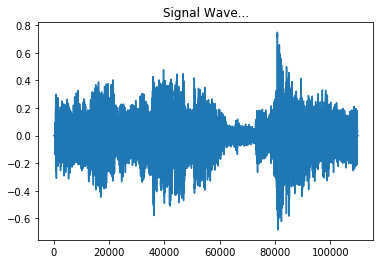

In [3]:
plt.figure(1)
plt.title("Signal Wave...")
plt.plot(data[0])
plt.show()

In [4]:
mu = np.mean(data, axis=0)

pca = decomposition.PCA()
pca.fit(data)

nComp = 110
dataprime = np.dot(pca.transform(data)[:,:nComp], pca.components_[:nComp,:])
dataprime += mu

print(dataprime.shape)

(43, 110000)


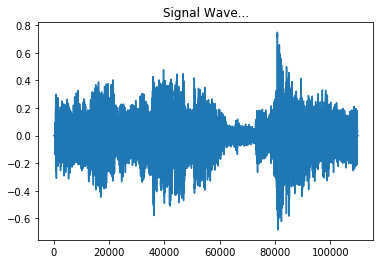

In [5]:
plt.figure(1)
plt.title("Signal Wave...")
plt.plot(dataprime[0])
plt.show()

In [6]:
data_for_output = zip(dataprime, filenames)
for x in data_for_output:
    sf.write(out_filepath + x[1], x[0], sr, format='wav')

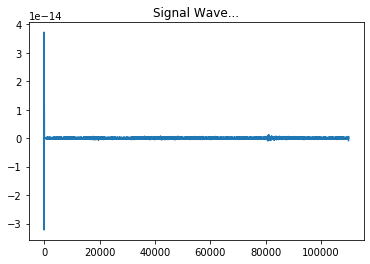

In [7]:
loss = zip(data, dataprime)
loss = list(map(lambda x: x[0] - x[1], loss))
plt.figure(1)
plt.title("Signal Wave...")
plt.plot(loss[0])
plt.show()